In [1]:
import numpy as np
import scipy.integrate as si
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

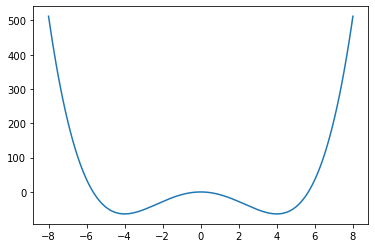

In [2]:
testxvec = np.linspace(-8,8,250)
def V(x):
    return -8*x**2 + 0.25*x**4

plt.plot(testxvec, V(testxvec))

In [3]:
def force(x):
    return 16*x - x**3

In [4]:
# number of masses
nm = 3

# track position and velocity of masses
# assume periodic (ring) arrangement
xstate = 2*nm

# idea
#\ddot{x}_i = force(x_i - x_{i-1}) - force(x_{i+1} - x_i)
#           = -k*(x_i - x_{i-1}) + k*(x_{i+1} - x_i)
#           = k*(x_{i-1} - 2*x_i + x_{i+1})

# define right-hand side function
# assume z is of shape (2*nm, k)
nu = 0.0
def ringosc(t, z):
    zout = np.zeros((2*nm, z.shape[1]))
    x = z[:nm,:]
    xdot = z[nm:,:]
    oscdiff = np.diff(x, axis=0, append=x[[0],:]) # stores x_{i+1} - x_i
    oscdiff1 = np.roll(oscdiff, shift=1)          # stores x_i - x_{i-1}
    xddot = force(oscdiff1) - force(oscdiff)      # difference of forces
    xddot -= nu*xdot
    return np.vstack([xdot, xddot])
    


In [5]:
# ringosc(0.0,np.expand_dims(np.array([1.,0.,0.,0.,0.,0.]),1))

In [6]:
# k = 1
# ztest = np.random.uniform(size=2*nm*k).reshape((2*nm, k))**2
# ztest = np.arange(2*nm*k).reshape((2*nm, k))**2
# print(ztest)
# print(ringosc(ztest))
# x = ztest[:nm,:]
# print(x)
# print(x[0,:])
# oscdiff = np.diff(x, axis=0, append=x[[0],:])
# oscdiff
# np.roll(oscdiff, shift=1)

In [13]:
# final time, number of solution pts, t_eval
ft = 4.0
numpts = 400
t_eval = np.arange(numpts+1)*(ft/numpts)

# initial condition: everything zero except one mass
def genonetraj(i):
    osc0 = 1.0*(np.random.uniform(size=2*nm) - 0.5)
    mysol = si.solve_ivp(fun=ringosc, t_span=[0, ft], method='DOP853',
                         y0=osc0, t_eval=t_eval, vectorized=True, rtol=1e-14, atol=1e-14)
    return mysol.y

alltraj = list(map(genonetraj, range(100)))

/home/hbhat/.conda/envs/myjax/lib/python3.6/site-packages/scipy/integrate/_ivp/common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


In [14]:
alltraj = np.stack(alltraj)

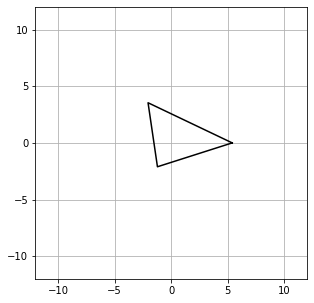

In [15]:
angles = np.arange(nm)*2*np.pi/nm

def live_plot(xin, yin, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.xlim(-12, 12)
    plt.ylim(-12, 12)
    x= [float(i) for i in xin]
    x.append(xin[0])
    y= [float(i) for i in yin]
    y.append(yin[0])
    
    if len(x) > 1:
        plt.plot(x,y, label='axis y', color='k')
        plt.gca().set_aspect(1.0)

    plt.title(title)
    plt.grid(True)
    plt.show();

prefac = 20
for i in range(numpts//prefac):
    x = (4+alltraj[0,:nm,i*prefac])*np.cos(angles)
    y = (4+alltraj[0,:nm,i*prefac])*np.sin(angles)
    live_plot(x, y)
    

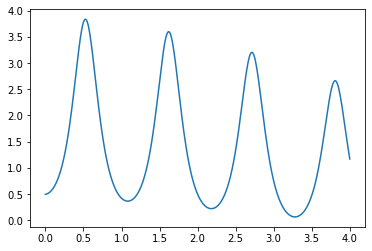

In [16]:
plt.plot(t_eval, alltraj[10,0,])

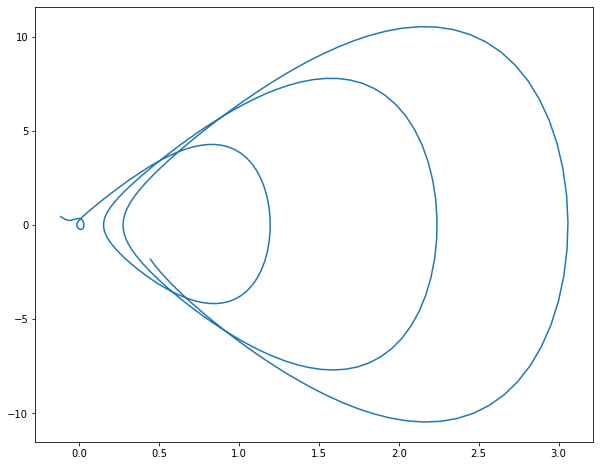

In [17]:
plt.figure(figsize=(10,8))
plt.plot(alltraj[0,0,:], alltraj[0,3,:])

In [18]:
# save trajectory to disk
np.savez('osctraj3.npz',alltraj)